In [1]:
import matplotlib.pyplot as plt 
from pathlib import Path 
from PIL import Image
from create_dataloaders import create_dataloader
import random

import torch
import torch.nn as nn
from torchvision import transforms

In [2]:
image_directory = Path("../../Projects/dog_breed_classification/data/Images")
print(image_directory)

../../Projects/dog_breed_classification/data/Images


In [3]:
image_height = 224
image_width = 224

In [4]:
data_transforms = transforms.Compose([
    transforms.RandomResizedCrop((256,480)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize(
        mean = [0.485, 0.456, 0.406],
        std = [0.229, 0.224, 0.225]),
    transforms.RandomResizedCrop((224,224)),
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1)
])

In [5]:
train_dataloader,test_dataloader = create_dataloader(images_directory=image_directory,
                                                     batch_size=32,
                                                     data_transforms=data_transforms,
                                                     num_workers=16
                                                     )

torch.Size([3, 224, 224])


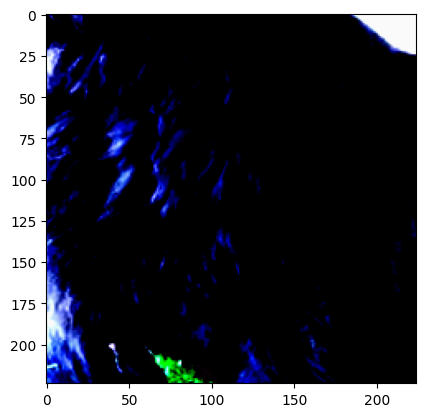

In [6]:
random.seed(42)
img,label = next(iter(train_dataloader))
print(img[1].shape)
plt.imshow(img[1].permute(1,2,0))

In [7]:
image_to_be_tested = img[1]
print(f"Original Image Shape:- {image_to_be_tested.shape}")

relu = nn.ReLU()

conv_layer1 = nn.Conv2d(in_channels=3,
                               out_channels=64,
                               kernel_size=7,
                               stride=2)

img_after_conv_layer_1 = relu(conv_layer1(img[1]))
print(f"After conv1: {img_after_conv_layer_1.shape}")

pooling_layer = nn.MaxPool2d(kernel_size=2)

img_after_pooling = pooling_layer(img_after_conv_layer_1)
print(f"After Pooling1: {img_after_pooling.shape}")


conv_layer2 = nn.Conv2d(in_channels=64,
                            out_channels=64,
                            kernel_size=3,
                            stride=1,
                            padding="same")

# Conv with filter size 64

img_after_conv2_1 = conv_layer2(img_after_pooling)
print(f"After Conv2_1: {img_after_conv2_1.shape}")

img_after_conv2_2 = conv_layer2(img_after_conv2_1)
print(f"After Conv2_2: {img_after_conv2_2.shape}")

residual_addition_1 = img_after_conv2_2 + img_after_pooling
print(f"After identity mapping1: {residual_addition_1.shape}")

img_after_conv2_3 = conv_layer2(residual_addition_1)
print(f"After Conv2_3: {img_after_conv2_3.shape}")

img_after_conv2_4 = conv_layer2(img_after_conv2_3)
print(f"After Conv2_4: {img_after_conv2_4.shape}")

residual_addition_2 = img_after_conv2_4 + residual_addition_1
print(f"After identity mapping2: {residual_addition_2.shape}")

img_after_conv2_5 = conv_layer2(residual_addition_2)
print(f"After Conv2_5: {img_after_conv2_5.shape}")

img_after_conv2_6 = conv_layer2(img_after_conv2_5)
print(f"After Conv2_6: {img_after_conv2_6.shape}")

residual_addition_3 = img_after_conv2_6 + residual_addition_2
print(f"After identity mapping3: {residual_addition_3.shape}")

conv_layer3 = nn.Conv2d(in_channels=64,
                        out_channels=128,
                        kernel_size=3,
                        stride=2,
                        padding=1)

conv_layer4 = nn.Conv2d(in_channels=128,
                        out_channels=128,
                        kernel_size=3,
                        stride=1,
                        padding=1)

# Conv with filter size 128

img_after_conv_128_1 = conv_layer3(residual_addition_3)
print(f"After Conv128_1: {img_after_conv_128_1.shape}")

img_after_conv_128_2 = conv_layer4(img_after_conv_128_1)
print(f"After Conv128_2: {img_after_conv_128_2.shape}")

conv_layer1x1 = nn.Conv2d(in_channels=64,
                        out_channels=128,
                        kernel_size=1,
                        stride=2,
                        padding=0)

change_dim_using_conv1x1 = conv_layer1x1(residual_addition_3)
print(f"After changing dimension with 1x1: {change_dim_using_conv1x1.shape}")

residual_addition_4 = img_after_conv_128_2 + change_dim_using_conv1x1
print(f"After identity mapping4: {residual_addition_4.shape}")


img_after_conv_128_3 = conv_layer4(residual_addition_4)
print(f"After Conv128_3: {img_after_conv_128_3.shape}")

img_after_conv_128_4 = conv_layer4(img_after_conv_128_3)
print(f"After Conv128_4: {img_after_conv_128_4.shape}")

residual_addition_5 = img_after_conv_128_4 + residual_addition_4
print(f"After identity mapping5: {residual_addition_5.shape}")

img_after_conv_128_5 = conv_layer4(residual_addition_5)
print(f"After Conv128_5: {img_after_conv_128_5.shape}")

img_after_conv_128_6 = conv_layer4(img_after_conv_128_5)
print(f"After Conv128_6: {img_after_conv_128_6.shape}")

residual_addition_6 = img_after_conv_128_6 + residual_addition_5
print(f"After identity mapping6: {residual_addition_6.shape}")

img_after_conv_128_7 = conv_layer4(residual_addition_6)
print(f"After Conv128_7: {img_after_conv_128_7.shape}")

img_after_conv_128_8 = conv_layer4(img_after_conv_128_7)
print(f"After Conv128_8: {img_after_conv_128_8.shape}")

residual_addition_7 = img_after_conv_128_8 + residual_addition_6
print(f"After identity mapping7: {residual_addition_7.shape}")


conv_layer5 = nn.Conv2d(in_channels=128,
                        out_channels=256,
                        kernel_size=3,
                        stride=2,
                        padding=1)

conv_layer6 = nn.Conv2d(in_channels=256,
                        out_channels=256,
                        kernel_size=3,
                        stride=1,
                        padding=1)

conv_layer1x1_2 = nn.Conv2d(in_channels=128,
                        out_channels=256,
                        kernel_size=1,
                        stride=2,
                        padding=0)

img_after_conv_256_1 = conv_layer5(residual_addition_7)
print(f"After Conv256_1: {img_after_conv_256_1.shape}")

img_after_conv_256_2 = conv_layer6(img_after_conv_256_1)
print(f"After Conv256_2: {img_after_conv_256_2.shape}")


change_dim_using_conv1x1 = conv_layer1x1_2(residual_addition_7)
print(f"After changing dimension with 1x1: {change_dim_using_conv1x1.shape}")

residual_addition = img_after_conv_256_2 + change_dim_using_conv1x1
print(f"After identity mapping: {residual_addition.shape}")

img_after_conv_256 = conv_layer6(residual_addition)
print(f"After Conv256: {img_after_conv_256.shape}")

img_after_conv_256 = conv_layer6(img_after_conv_256)
print(f"After Conv256: {img_after_conv_256.shape}")

residual_addition = img_after_conv_256 + residual_addition
print(f"After identity mapping7: {residual_addition.shape}")

img_after_conv_256 = conv_layer6(residual_addition)
print(f"After Conv256: {img_after_conv_256.shape}")

img_after_conv_256 = conv_layer6(img_after_conv_256)
print(f"After Conv256: {img_after_conv_256.shape}")

residual_addition = img_after_conv_256 + residual_addition
print(f"After identity mapping7: {residual_addition.shape}")

img_after_conv_256 = conv_layer6(residual_addition)
print(f"After Conv256: {img_after_conv_256.shape}")

img_after_conv_256 = conv_layer6(img_after_conv_256)
print(f"After Conv256: {img_after_conv_256.shape}")

residual_addition = img_after_conv_256 + residual_addition
print(f"After identity mapping7: {residual_addition.shape}")

img_after_conv_256 = conv_layer6(residual_addition)
print(f"After Conv256: {img_after_conv_256.shape}")

img_after_conv_256 = conv_layer6(img_after_conv_256)
print(f"After Conv256: {img_after_conv_256.shape}")

residual_addition = img_after_conv_256 + residual_addition
print(f"After identity mapping7: {residual_addition.shape}")

img_after_conv_256 = conv_layer6(residual_addition)
print(f"After Conv256: {img_after_conv_256.shape}")

img_after_conv_256 = conv_layer6(img_after_conv_256)
print(f"After Conv256: {img_after_conv_256.shape}")

residual_addition = img_after_conv_256 + residual_addition
print(f"After identity mapping7: {residual_addition.shape}")

conv_layer7 = nn.Conv2d(in_channels=256,
                        out_channels=512,
                        kernel_size=3,
                        stride=2,
                        padding=1)

conv_layer8 = nn.Conv2d(in_channels=512,
                        out_channels=512,
                        kernel_size=3,
                        stride=1,
                        padding=1)

conv_layer1x1_3 = nn.Conv2d(in_channels=256,
                        out_channels=512,
                        kernel_size=1,
                        stride=2,
                        padding=0)

img_after_conv_512 = conv_layer7(residual_addition)
print(f"After Conv512: {img_after_conv_512.shape}")

img_after_conv_512 = conv_layer8(img_after_conv_512)
print(f"After Conv512: {img_after_conv_512.shape}")

change_dim_using_conv1x1 = conv_layer1x1_3(residual_addition)
print(f"After changing dimension with 1x1: {change_dim_using_conv1x1.shape}")

residual_addition = img_after_conv_512 + change_dim_using_conv1x1
print(f"After identity mapping: {residual_addition.shape}")

img_after_conv_512 = conv_layer8(residual_addition)
print(f"After Conv512: {img_after_conv_512.shape}")

img_after_conv_512 = conv_layer8(img_after_conv_512)
print(f"After Conv512: {img_after_conv_512.shape}")

residual_addition = img_after_conv_512 + residual_addition
print(f"After identity mapping: {residual_addition.shape}")

img_after_conv_512 = conv_layer8(residual_addition)
print(f"After Conv512: {img_after_conv_512.shape}")

img_after_conv_512 = conv_layer8(img_after_conv_512)
print(f"After Conv512: {img_after_conv_512.shape}")

residual_addition = img_after_conv_512 + residual_addition
print(f"After identity mapping: {residual_addition.shape}")

avg_pool = nn.AvgPool2d(2)
shape_after_avg_pool = avg_pool(residual_addition)
print(shape_after_avg_pool.shape)


Original Image Shape:- torch.Size([3, 224, 224])
After conv1: torch.Size([64, 109, 109])
After Pooling1: torch.Size([64, 54, 54])
After Conv2_1: torch.Size([64, 54, 54])
After Conv2_2: torch.Size([64, 54, 54])
After identity mapping1: torch.Size([64, 54, 54])
After Conv2_3: torch.Size([64, 54, 54])
After Conv2_4: torch.Size([64, 54, 54])
After identity mapping2: torch.Size([64, 54, 54])
After Conv2_5: torch.Size([64, 54, 54])
After Conv2_6: torch.Size([64, 54, 54])
After identity mapping3: torch.Size([64, 54, 54])
After Conv128_1: torch.Size([128, 27, 27])
After Conv128_2: torch.Size([128, 27, 27])
After changing dimension with 1x1: torch.Size([128, 27, 27])
After identity mapping4: torch.Size([128, 27, 27])
After Conv128_3: torch.Size([128, 27, 27])
After Conv128_4: torch.Size([128, 27, 27])
After identity mapping5: torch.Size([128, 27, 27])
After Conv128_5: torch.Size([128, 27, 27])
After Conv128_6: torch.Size([128, 27, 27])
After identity mapping6: torch.Size([128, 27, 27])
After Co

In [34]:
class Resnet34(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        self.conv1 = nn.Conv2d(in_channels=3,
                               out_channels=64,
                               kernel_size=7,
                               stride=2)
        
        self.batch_normalization1 = nn.BatchNorm2d(64)
        
        self.pool1 = nn.MaxPool2d(kernel_size=2)
        
        self.conv_layer2 = nn.Conv2d(in_channels=64,
                            out_channels=64,
                            kernel_size=3,
                            stride=1,
                            padding="same")
        
        

        self.conv_layer3 = nn.Conv2d(in_channels=64,
                        out_channels=128,
                        kernel_size=3,
                        stride=2,
                        padding=1)
        
        self.batch_normalization2 = nn.BatchNorm2d(128)
        
        self.conv_layer4 = nn.Conv2d(in_channels=128,
                        out_channels=128,
                        kernel_size=3,
                        stride=1,
                        padding=1)
        
        self.conv_layer1x1 = nn.Conv2d(in_channels=64,
                        out_channels=128,
                        kernel_size=1,
                        stride=2,
                        padding=0)
        
        self.conv_layer5 = nn.Conv2d(in_channels=128,
                        out_channels=256,
                        kernel_size=3,
                        stride=2,
                        padding=1)
        
        self.batch_normalization3 = nn.BatchNorm2d(256)
        
        
        self.conv_layer6 = nn.Conv2d(in_channels=256,
                        out_channels=256,
                        kernel_size=3,
                        stride=1,
                        padding=1)
        
        self.conv_layer1x1_2 = nn.Conv2d(in_channels=128,
                        out_channels=256,
                        kernel_size=1,
                        stride=2,
                        padding=0)
        
        self.conv_layer7 = nn.Conv2d(in_channels=256,
                        out_channels=512,
                        kernel_size=3,
                        stride=2,
                        padding=1)
        
        self.batch_normalization4 = nn.BatchNorm2d(512)
        
        self.conv_layer8 = nn.Conv2d(in_channels=512,
                        out_channels=512,
                        kernel_size=3,
                        stride=1,
                        padding=1)
        
        self.conv_layer1x1_3 = nn.Conv2d(in_channels=256,
                        out_channels=512,
                        kernel_size=1,
                        stride=2,
                        padding=0)
        
        self.avg_pool = nn.AvgPool2d(2)
        self.flatten = nn.Flatten()
        self.linear_layer = nn.Linear(in_features=4608,
                                      out_features=120)
        
        self.relu = nn.ReLU()
        
        
    def forward(self,x):
        
        
        conv1_op = self.relu(self.batch_normalization1(self.conv1(x)))
        pool1 = self.pool1(conv1_op)
        
        conv64_1= self.relu(self.batch_normalization1(self.conv_layer2(pool1)))
        conv64_2 = self.relu(self.batch_normalization1(self.conv_layer2(conv64_1)))
        resid_add1 = conv64_2 + pool1
        conv64_3 = self.relu(self.batch_normalization1(self.conv_layer2(resid_add1)))
        conv64_4 = self.relu(self.batch_normalization1(self.conv_layer2(conv64_3)))
        resid_add2 = conv64_4 + resid_add1
        conv64_5 = self.relu(self.batch_normalization1(self.conv_layer2(resid_add2)))
        conv64_6 = self.relu(self.batch_normalization1(self.conv_layer2(conv64_5)))
        resid_add3 = conv64_6 + resid_add2
        
        conv128_1 = self.relu(self.batch_normalization2(self.conv_layer3(resid_add3)))
        conv128_2 = self.relu(self.batch_normalization2(self.conv_layer4(conv128_1)))
        
        reshaped_1 = self.conv_layer1x1(resid_add3)
        resid_add4 = conv128_2 + reshaped_1
        
        conv128_3 = self.relu(self.batch_normalization2(self.conv_layer4(resid_add4)))
        conv128_4 = self.relu(self.batch_normalization2(self.conv_layer4(conv128_3)))
        resid_add5 = conv128_4 + resid_add4
        conv128_5 = self.relu(self.batch_normalization2(self.conv_layer4(resid_add5)))
        conv128_6 = self.relu(self.batch_normalization2(self.conv_layer4(conv128_5)))
        resid_add6 = conv128_6 + resid_add5 
        conv128_7 = self.relu(self.batch_normalization2(self.conv_layer4(resid_add6)))
        conv128_8 = self.relu(self.batch_normalization2(self.conv_layer4(conv128_7)))
        resid_add7 = conv128_8 + resid_add6
        
        conv256_1 = self.relu(self.batch_normalization3(self.conv_layer5(resid_add7)))
        conv256_2 = self.relu(self.batch_normalization3(self.conv_layer6(conv256_1)))
        
        reshaped_2 = self.conv_layer1x1_2(resid_add7)
        resid_add8 = conv256_2 + reshaped_2
        
        conv256_3 = self.relu(self.batch_normalization3(self.conv_layer6(resid_add8)))
        conv256_4 = self.relu(self.batch_normalization3(self.conv_layer6(conv256_3)))
        resid_add9 = conv256_4 + resid_add8
        conv256_5 = self.relu(self.batch_normalization3(self.conv_layer6(resid_add9)))
        conv256_6 = self.relu(self.batch_normalization3(self.conv_layer6(conv256_5)))
        resid_add10 = conv256_6 + resid_add9
        conv256_7 = self.relu(self.batch_normalization3(self.conv_layer6(resid_add10)))
        conv256_8 = self.relu(self.batch_normalization3(self.conv_layer6(conv256_7)))
        resid_add11 = conv256_8 + resid_add10
        conv256_9 = self.relu(self.batch_normalization3(self.conv_layer6(resid_add11)))
        conv256_10 = self.relu(self.batch_normalization3(self.conv_layer6(conv256_9)))
        resid_add12 = conv256_10 + resid_add11
        conv256_11 = self.relu(self.batch_normalization3(self.conv_layer6(resid_add12)))
        conv256_12 = self.relu(self.batch_normalization3(self.conv_layer6(conv256_11)))
        resid_add13 = conv256_12 + resid_add12
        
        conv512_1 = self.relu(self.batch_normalization4(self.conv_layer7(resid_add13)))
        conv512_2 = self.relu(self.batch_normalization4(self.conv_layer8(conv512_1)))
        
        reshaped_3 = self.conv_layer1x1_3(resid_add13)
        resid_add14 = conv512_2 + reshaped_3
        
        conv512_3 = self.relu(self.batch_normalization4(self.conv_layer8(resid_add14)))
        conv512_4 = self.relu(self.batch_normalization4(self.conv_layer8(conv512_3)))
        resid_add15 = conv512_4 + resid_add14
        conv512_5 = self.relu(self.batch_normalization4(self.conv_layer8(resid_add15)))
        conv512_6 = self.relu(self.batch_normalization4(self.conv_layer8(conv512_5)))
        resid_add16 = conv512_6 + resid_add15
        conv512_7 = self.relu(self.batch_normalization4(self.conv_layer8(resid_add16)))
        conv512_8 = self.relu(self.batch_normalization4(self.conv_layer8(conv512_7)))
        
        avg_pool = self.avg_pool(conv512_8)
        flatten = self.flatten(avg_pool)
        return self.linear_layer(flatten)

In [35]:
resnet_model = Resnet34()

In [36]:
image_to_be_tested.unsqueeze(dim=0).shape

torch.Size([1, 3, 224, 224])

In [37]:
output = resnet_model(image_to_be_tested.unsqueeze(dim=0))

In [38]:
torch.argmax(output)

tensor(13)